In [3]:
# Import all Liblaries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

C:\Users\duzgun.ilaslan\AppData\Local\Temp\ipykernel_17152\3333064296.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,Image


In [5]:
# Define Linear Regression Class

class LinearRegression:
    def __init__(self,learning_rate = 0.001,n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weight = None
        self.bias = None

    def fit(self,X,y):
        n_samples, n_features = X.shape

        # init parameters
        self.weight =  np.zeros(n_features)
        self.bias = 0

        # Gradient Desent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weight) + self.bias
            # Compute Gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update Parameters
            self.weight -= self.lr * dw
            self.bias -= self.lr * db
    #Predict Method
    def predict(self,X):
        y_approximated = np.dot(X, self.weight) + self.bias
        return  y_approximated
        
# MSE Method
def mean_squered_eror(y_true,y_pred):
    return np.mean((y_true - y_pred) **2)



In [19]:
#get Dataset for regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [24]:
# Create a Model
regressor = LinearRegression(learning_rate=0.01,n_iters=1000)

In [25]:
# Training part
regressor.fit(X_train,y_train)

In [34]:
# Prediction Part
predictions = regressor.predict(X_test)

In [27]:
# MSE
mse = mean_squered_eror(y_test,predictions)
print("MSE:" ,mse)

MSE: 305.7719958301902


In [28]:
# Prediction Line
y_pred_line = regressor.predict(X)

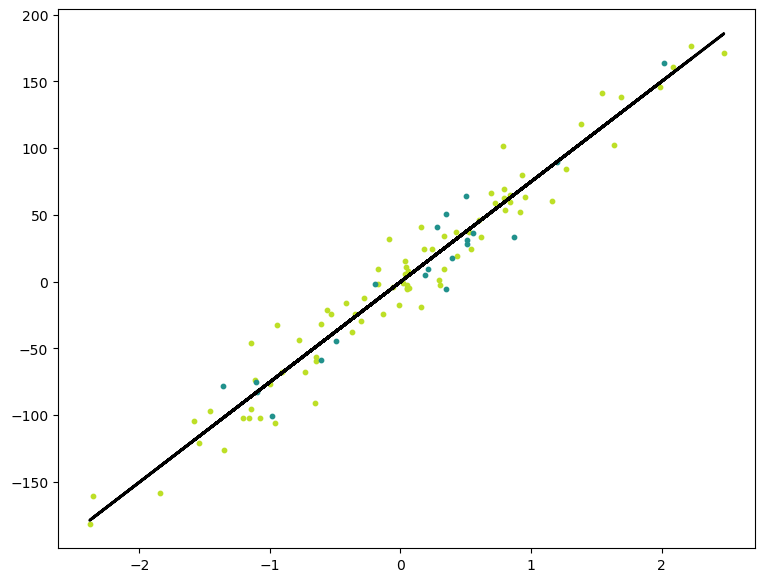

In [29]:
#Plotting
 
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(9,7))
m1 = plt.scatter(X_train,y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5), s=10)
plt.plot(X,y_pred_line,color="black",linewidth=2,label = "Prediction")
plt.show()